## Boas vindas ao primeiro desafio!

Durante este desafio, você irá ajudar o Senhor João a decidir qual loja da sua rede Alura Store vender para iniciar um novo empreendimento. Para isso, você analisará dados de vendas, desempenho e avaliações das 4 lojas fictícias da Alura Store. O objetivo é identificar a loja com menor eficiência e apresentar uma recomendação final baseada nos dados.

##O que você vai praticar:

* Carregar e manipular dados CSV com a biblioteca Pandas .

* Criar visualizações de dados com biblioteca Matplotlib.

* Analisar métricas como faturamento, avaliações e desempenho de vendas.

## Requisitos:

1. Analisar os dados das lojas:

  * Você deve avaliar informações como faturamento, categorias mais vendidas, avaliações dos clientes, produtos mais vendidos e frete médio.

2. Criar gráficos para visualização:

  * Decida quais tipos de gráficos usar para apresentar os resultados de maneira clara e visual.

3. Mínimo de 3 gráficos diferentes, que podem incluir gráficos de barras, pizza, dispersão, entre outros.

4. Apresentar uma recomendação:

  * Após as análises, escreva um texto explicando qual loja o Senhor João deve vender e por quê, com base nos dados apresentados.

Bom projeto!

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, count, avg
from functools import reduce

In [0]:

urls = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv", "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv", "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv", "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

stores_name = ['loja_1', 'loja_2', 'loja_3', 'loja_4',]

In [0]:
#load df pandas 
dfs_pandas = [pd.read_csv(url) for url in urls]

# Transform df pandas to df spark
dfs_spark = [spark.createDataFrame(df) for df in dfs_pandas]

# Show schemas
for df in dfs_spark:
    df.printSchema()

root
 |-- Produto: string (nullable = true)
 |-- Categoria do Produto: string (nullable = true)
 |-- Preço: double (nullable = true)
 |-- Frete: double (nullable = true)
 |-- Data da Compra: string (nullable = true)
 |-- Vendedor: string (nullable = true)
 |-- Local da compra: string (nullable = true)
 |-- Avaliação da compra: long (nullable = true)
 |-- Tipo de pagamento: string (nullable = true)
 |-- Quantidade de parcelas: long (nullable = true)
 |-- lat: double (nullable = true)
 |-- lon: double (nullable = true)

root
 |-- Produto: string (nullable = true)
 |-- Categoria do Produto: string (nullable = true)
 |-- Preço: double (nullable = true)
 |-- Frete: double (nullable = true)
 |-- Data da Compra: string (nullable = true)
 |-- Vendedor: string (nullable = true)
 |-- Local da compra: string (nullable = true)
 |-- Avaliação da compra: long (nullable = true)
 |-- Tipo de pagamento: string (nullable = true)
 |-- Quantidade de parcelas: long (nullable = true)
 |-- lat: double (nulla

## Verificando nulos

In [0]:

for df in dfs_spark:
  df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns]).show()


+-------+--------------------+-----+-----+--------------+--------+---------------+-------------------+-----------------+----------------------+---+---+
|Produto|Categoria do Produto|Preço|Frete|Data da Compra|Vendedor|Local da compra|Avaliação da compra|Tipo de pagamento|Quantidade de parcelas|lat|lon|
+-------+--------------------+-----+-----+--------------+--------+---------------+-------------------+-----------------+----------------------+---+---+
|      0|                   0|    0|    0|             0|       0|              0|                  0|                0|                     0|  0|  0|
+-------+--------------------+-----+-----+--------------+--------+---------------+-------------------+-----------------+----------------------+---+---+

+-------+--------------------+-----+-----+--------------+--------+---------------+-------------------+-----------------+----------------------+---+---+
|Produto|Categoria do Produto|Preço|Frete|Data da Compra|Vendedor|Local da compra|Avali

## Exibindo uma amostra de um dos dataframe

In [0]:
# Exibindo as colunas do df
[df.columns for df in dfs_spark]

[['Produto',
  'Categoria do Produto',
  'Preço',
  'Frete',
  'Data da Compra',
  'Vendedor',
  'Local da compra',
  'Avaliação da compra',
  'Tipo de pagamento',
  'Quantidade de parcelas',
  'lat',
  'lon'],
 ['Produto',
  'Categoria do Produto',
  'Preço',
  'Frete',
  'Data da Compra',
  'Vendedor',
  'Local da compra',
  'Avaliação da compra',
  'Tipo de pagamento',
  'Quantidade de parcelas',
  'lat',
  'lon'],
 ['Produto',
  'Categoria do Produto',
  'Preço',
  'Frete',
  'Data da Compra',
  'Vendedor',
  'Local da compra',
  'Avaliação da compra',
  'Tipo de pagamento',
  'Quantidade de parcelas',
  'lat',
  'lon'],
 ['Produto',
  'Categoria do Produto',
  'Preço',
  'Frete',
  'Data da Compra',
  'Vendedor',
  'Local da compra',
  'Avaliação da compra',
  'Tipo de pagamento',
  'Quantidade de parcelas',
  'lat',
  'lon']]

In [0]:
# Exibindo amostra aleatória de 1% do conteúdo do df
dfs_spark[0].sample(fraction=0.01).display()

Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
Jogo de tabuleiro,brinquedos,279.51,21.2626809863,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
Carrinho controle remoto,brinquedos,112.75,6.5347028276,02/11/2021,Pedro Gomes,RJ,5,cartao_credito,1,-22.25,-42.66
Smartwatch,eletronicos,206.98,8.605501387,16/01/2022,Isabella Pereira,MG,5,cartao_credito,5,-18.1,-44.38
Corda de pular,esporte e lazer,26.96,0.0,16/03/2023,Larissa Alves,SP,4,cartao_credito,3,-22.19,-48.79
Assistente virtual,eletronicos,369.18,17.2421634239,11/12/2021,João Souza,MG,5,cartao_credito,3,-18.1,-44.38
Poltrona,moveis,251.37,10.969135344,01/02/2022,Isabella Pereira,AL,4,boleto,1,-9.62,-36.82
Guarda roupas,moveis,684.74,34.044784092,24/04/2022,Rafael Costa,SP,5,cupom,1,-22.19,-48.79
Corda de pular,esporte e lazer,14.01,0.0,09/09/2020,Beatriz Moraes,SP,5,cartao_credito,1,-22.19,-48.79
Pandeiro,instrumentos musicais,74.44,4.2468319632,01/12/2021,Felipe Santos,MA,5,boleto,1,-5.42,-45.44
Modelagem preditiva,livros,73.05,1.4741318025,27/06/2022,Pedro Gomes,SP,4,cartao_credito,2,-22.19,-48.79


## 1. Análise do Faturamento

Nesta primeira análise, calcularemos o faturamento total de cada loja. Somando os valores da coluna Preço de cada loja para estimar o faturamento.

In [0]:
# Faz a soma dos valores da preço em todos os dfs e armazena em um numpy.array
faturamento_bruto_loja =  np.array([df.select(sum('Preço')).collect()[0][0] for df in dfs_spark])
# Soma do faturamento das 4 lojas
faturamento_bruto_loja_total = np.sum(faturamento_bruto_loja)
# Soma do custo com frete das lojas,
custo_frete_loja = np.array(([df.select(sum('Frete')).collect()[0][0] for df in dfs_spark]))
# Soma do custo com frete total
custo_frete_total = np.sum(custo_frete_loja)

# Faturamento deduzido custo com frete por loja
faturamento_menos_custo_frete_total = faturamento_bruto_loja_total - custo_frete_total
# Faturamento deduzido custo com frete total
faturamento_menos_custo_frete_loja = faturamento_bruto_loja - custo_frete_loja


## Plote Faturamento Bruto

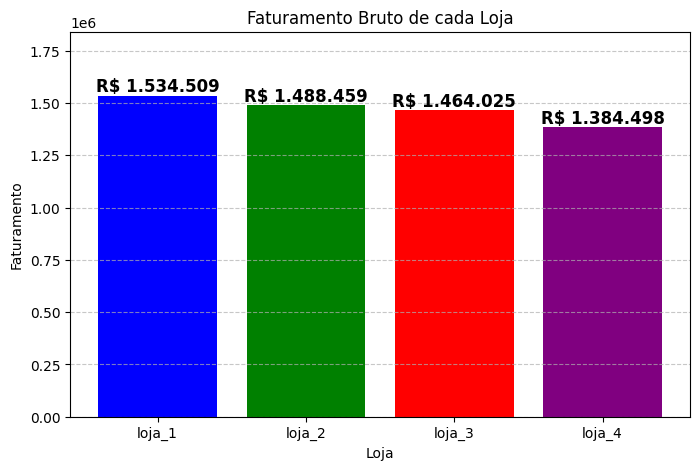

In [0]:
plt.figure(figsize=(8, 5))
bars = plt.bar(stores_name, faturamento_bruto_loja, color=['blue', 'green', 'red', 'purple'])

# Adicionar valores acima das colunas
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'R$ {bar.get_height():,.0f}'.replace(",", "."), 
             ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
# Adicionar título e rótulos
plt.ylim(0, max(faturamento_bruto_loja) * 1.2)  # Ajusta o limite superior do eixo Y

plt.title("Faturamento Bruto de cada Loja")
plt.xlabel("Loja")
plt.ylabel("Faturamento")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar o gráfico
plt.show()

Plote Faturamento menos o frete

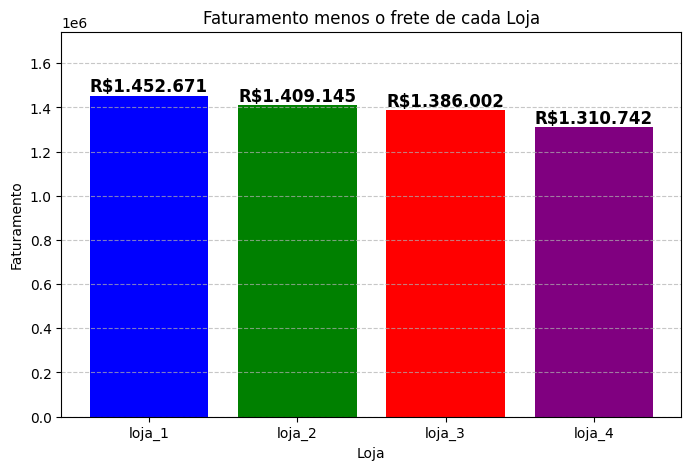

In [0]:
# Crir plote
plt.figure(figsize=(8, 5))
bars = plt.bar(stores_name, faturamento_menos_custo_frete_loja, color=['blue', 'green', 'red', 'purple'])

# Adicionar valores acima das colunas
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'R${bar.get_height():,.0f}'.replace(",", "."), 
             ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
# Adicionar título e rótulos
plt.ylim(0, max(faturamento_menos_custo_frete_loja) * 1.2)  # Ajusta o limite superior do eixo Y

plt.title("Faturamento menos o frete de cada Loja")
plt.xlabel("Loja")
plt.ylabel("Faturamento")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar o gráfico
plt.show()

## 2. Vendas por Categoria


Neste passo, deve calcular a quantidade de produtos vendidos por categoria em cada loja. A ideia é agrupar os dados por categoria e contar o número de vendas de cada tipo, mostrando as categoria mais populares de cada loja

In [0]:
# Criado uma listas onde cada item é um df com a contagem das categorias de produtos vendidos em ordem do maior para o menor.
vendas_categoria = [df.groupBy("Categoria do Produto").count().orderBy("count", ascending=False) for df in dfs_spark]

# convertendo o df para pandas para faciliar a integração das tabelas
vendas_categoria_p = [vendas_categoria[i].toPandas() for i in range(len(vendas_categoria))]

# Concatenando as tabelas, mantendo a coluna categoria da loja_1 e a quantidade das restantes.
df_categorias_vendas = pd.concat(vendas_categoria_p, axis=1)

lojas = ['Loja1', 'quantidade_1', 'Loja2', 'quantidade_2', 'Loja3', 'quantidade_3', 'Loja4', 'quantidade_4',]
df_categorias_vendas.columns = lojas

# Voltando a tabela concatenada para spark
spark_categoria_vendas = spark.createDataFrame(df_categorias_vendas)
categoria_vendas = spark_categoria_vendas.select('Loja1', 'quantidade_1', 'quantidade_2','quantidade_3','quantidade_4')

# Renomeando colunas
old_cols = categoria_vendas.columns
new_cols = ['categoria', 'loja_1','loja_2','loja_3','loja_4']
rename_cols = {key: value for key, value in zip(old_cols, new_cols)}

for old, new in rename_cols.items():
    categoria_vendas = categoria_vendas.withColumnRenamed(old, new)

In [0]:
# Amostra de como ficou o df concatenado
categoria_vendas.display()

categoria,loja_1,loja_2,loja_3,loja_4
moveis,465,442,499,480
eletronicos,448,422,451,451
brinquedos,324,313,315,338
eletrodomesticos,312,305,278,277
esporte e lazer,284,275,277,254
instrumentos musicais,182,224,185,201
livros,173,197,177,187
utilidades domesticas,171,181,177,170


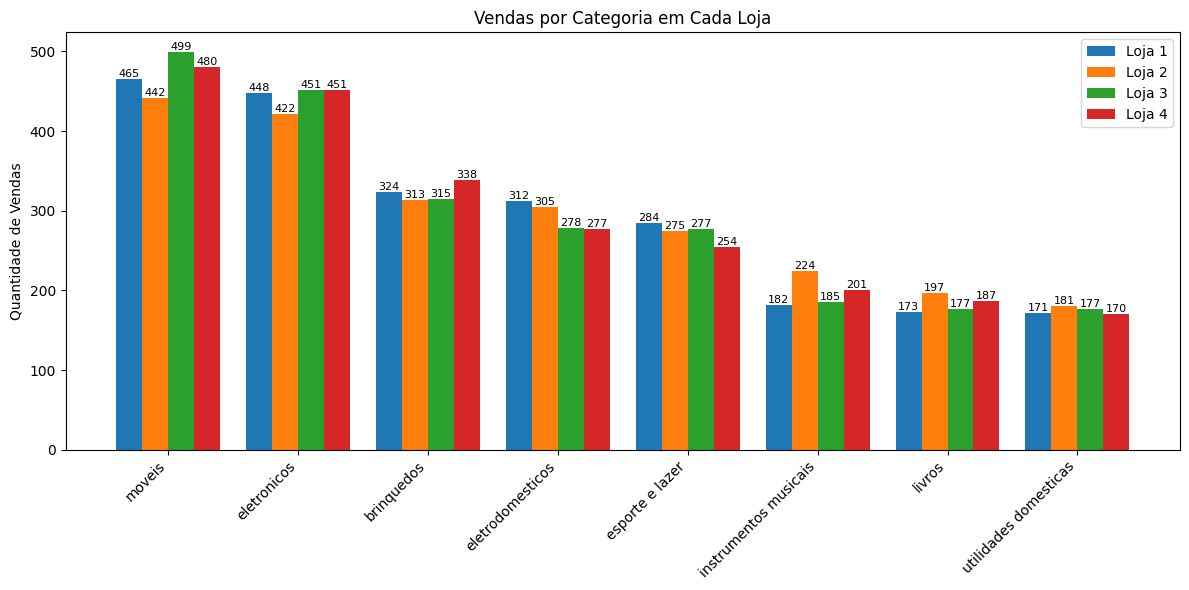

In [0]:
plotar = categoria_vendas.toPandas()

# Plot
categorias = plotar['categoria'].tolist()
x = np.arange(len(categorias))  # posição das categorias
largura = 0.2  # largura das barras

fig, ax = plt.subplots(figsize=(12, 6))

# Barras para cada loja
ax.bar(x - 1.5*largura, plotar['loja_1'], width=largura, label='Loja 1')
ax.bar(x - 0.5*largura, plotar['loja_2'], width=largura, label='Loja 2')
ax.bar(x + 0.5*largura, plotar['loja_3'], width=largura, label='Loja 3')
ax.bar(x + 1.5*largura, plotar['loja_4'], width=largura, label='Loja 4')

# Adicionar valores acima das colunas
for i, loja in enumerate(["loja_1", "loja_2", "loja_3", "loja_4"]):
    for bar in ax.containers[i]:
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # Posição X
            bar.get_height(),  # Posição Y
            f"{bar.get_height():,.0f}".replace(",", "."),  # Formatação do número
            ha="center", va="bottom", fontsize=8, color="black"
        )

# Labels
ax.set_xticks(x)
ax.set_xticklabels(categorias, rotation=45, ha='right')
ax.set_ylabel('Quantidade de Vendas')
ax.set_title('Vendas por Categoria em Cada Loja')
ax.legend()

plt.tight_layout()
plt.show()


## 3. Média de Avaliação das Lojas


Neste passo, calcularemos a média das avaliações dos clientes para cada loja. O objetivo é entender a satisfação dos clientes com os produtos vendidos.


No contexto de avaliação onde temos um sistema de pontuação que vai de 1 - ruim, a 5 - ótimo, como cada ponto tem um peso diferente, a melhor forma de calcular a média de avaliação é utilizando a fórmula da média ponderada.

![media_ponderada]('/dbfs/FileStore/tables/raw/mediaponderada.png')

In [0]:
#lista de dfs da coluna de avaliação com contagem de valores em ordem do maior para o menor
lista_avaliacao = [df.groupBy("Avaliação da compra").count().orderBy("count", ascending=False) for df in dfs_spark]

#renomeando as colunas count para facilitar no agrupamento das tabelas
for i, df in enumerate(lista_avaliacao):
    lista_avaliacao[i] = df.withColumnRenamed('count', f'loja_{i+1}')

#convertendo a lista de dfs spark em pandas
lista_avaliacao_pandas = [lista_avaliacao[i].toPandas() for i in range(len(vendas_categoria))]

# juntando os dfs pandas com merge
df_avaliacao_pandas = lista_avaliacao_pandas[0].merge(lista_avaliacao_pandas[1], on='Avaliação da compra')\
    .merge(lista_avaliacao_pandas[2], on='Avaliação da compra')\
    .merge(lista_avaliacao_pandas[3], on='Avaliação da compra')

# convertendo o df mergeado para spark
df_avaliacao_spark = spark.createDataFrame(df_avaliacao_pandas).orderBy('Avaliação da compra')

In [0]:
df_avaliacao_spark.show()

+-------------------+------+------+------+------+
|Avaliação da compra|loja_1|loja_2|loja_3|loja_4|
+-------------------+------+------+------+------+
|                  1|   319|   273|   297|   310|
|                  2|    86|    93|    79|    85|
|                  3|   218|   209|   193|   210|
|                  4|   444|   482|   434|   453|
|                  5|  1292|  1302|  1356|  1300|
+-------------------+------+------+------+------+



In [0]:
nomes_lojas = ["loja_1", "loja_2", "loja_3", "loja_4"]
media_ponderada_lojas = [df_avaliacao_spark.select(
        (sum(col("Avaliação da compra") * col(loja)) / sum(col(loja))).alias(f"media_{loja}")
    ).collect()[0][f"media_{loja}"] for loja in nomes_lojas]

media_geral_todas = np.sum(media_ponderada)

### Plot da média ponderada por loja

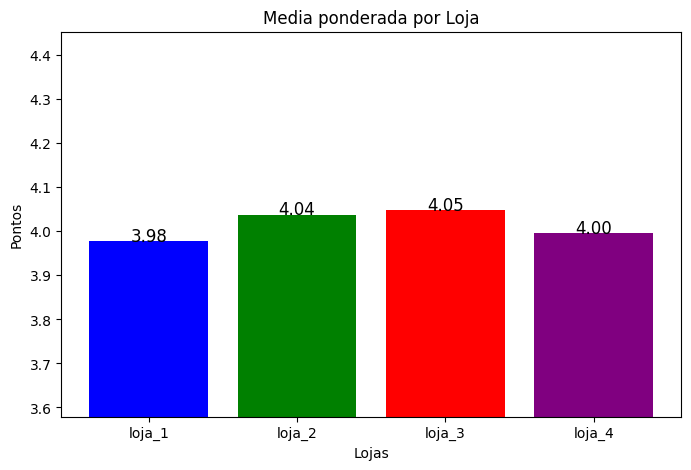

In [0]:
plt.figure(figsize=(8,5))
plt.bar(nomes_lojas, media_ponderada_lojas, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Lojas')
plt.ylabel("Pontos")
plt.title("Media ponderada por Loja")
plt.ylim(min(media_ponderada_lojas) * 0.9, max(media_ponderada_lojas) * 1.1) 
for i, v in enumerate(media_ponderada_lojas):
    plt.text(i, v, f'{v:.2f}', ha='center', fontsize=12)
plt.show()

### Plot da quantidade de avaliações por pontos em cada Loja

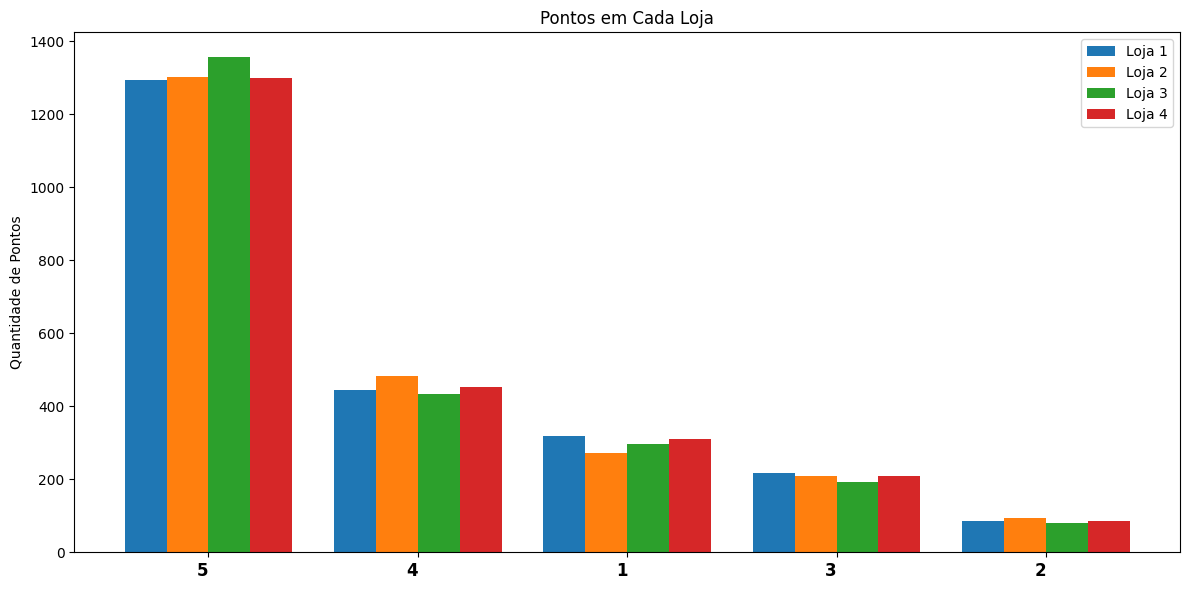

In [0]:

# Gerando o plot
estrelas = df_avaliacao_pandas['Avaliação da compra'].tolist()
x = np.arange(len(estrelas))  # posição das categorias
largura = 0.2  # largura das barras

fig, ax = plt.subplots(figsize=(12, 6))

# Barras para cada loja
ax.bar(x - 1.5*largura, df_avaliacao_pandas['loja_1'], width=largura, label='Loja 1')
ax.bar(x - 0.5*largura, df_avaliacao_pandas['loja_2'], width=largura, label='Loja 2')
ax.bar(x + 0.5*largura, df_avaliacao_pandas['loja_3'], width=largura, label='Loja 3')
ax.bar(x + 1.5*largura, df_avaliacao_pandas['loja_4'], width=largura, label='Loja 4')

# Labels
ax.set_xticks(x)
ax.set_xticklabels(estrelas, ha='right', fontsize=12,fontweight='bold')
ax.set_ylabel('Quantidade de Pontos')
ax.set_title('Pontos em Cada Loja')
ax.legend()

plt.tight_layout()
plt.show()

In [0]:
df_avaliacao_spark.display()

Avaliação da compra,loja_1,loja_2,loja_3,loja_4
1,319,273,297,310
2,86,93,79,85
3,218,209,193,210
4,444,482,434,453
5,1292,1302,1356,1300


## 4. Produtos Mais e Menos Vendidos

Neste passo, deve identificar quais produtos foram os mais vendidos e os menos vendidos em cada loja.  Ao final, visualize os resultados de forma que fique claro quais produtos se destacaram nas vendas de cada loja.



In [0]:
# 3 mais vendidos por loja
produtos_mais_vendidos = [dfs_spark[i].groupBy('Produto').count().orderBy('count', ascending=False).limit(3) for i in range(len(dfs_spark))]

# 3 menos vendidos por loja
produtos_menos_vendidos = [dfs_spark[i].groupBy('Produto').count().orderBy('count').limit(3) for i in range(len(dfs_spark))]

In [0]:
for i in range(len(produtos_mais_vendidos)):
    produtos_mais_vendidos[i].show()

+-------------+-----+
|      Produto|count|
+-------------+-----+
|TV Led UHD 4K|   60|
|Guarda roupas|   60|
|  Micro-ondas|   60|
+-------------+-----+

+--------------------+-----+
|             Produto|count|
+--------------------+-----+
|Iniciando em prog...|   65|
|         Micro-ondas|   62|
|             Bateria|   61|
+--------------------+-----+

+--------------+-----+
|       Produto|count|
+--------------+-----+
| Kit banquetas|   57|
|     Cama king|   56|
|Mesa de jantar|   56|
+--------------+-----+

+---------+-----+
|  Produto|count|
+---------+-----+
| Cama box|   62|
| Faqueiro|   59|
|Cama king|   56|
+---------+-----+



### 5. Frete Médio por Loja

Neste passo, vamos calcular o custo médio de frete para cada loja. O objetivo é entender quanto, em média, está sendo gasto com frete para cada uma das lojas.

In [0]:
dfs_spark[0].limit(3).display()

Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
Assistente virtual,eletronicos,219.08,9.2497899853,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
Mesa de jantar,moveis,256.35,11.2343053621,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
Jogo de tabuleiro,brinquedos,279.51,21.2626809863,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86


In [0]:
soma_frete_por_loja = [df.select(sum(col='Frete').alias('Total')).collect()[0]['Total'] for df in dfs_spark]
soma_total_frete = np.sum(frete_por_loja)
total_frete

312930.6621499623

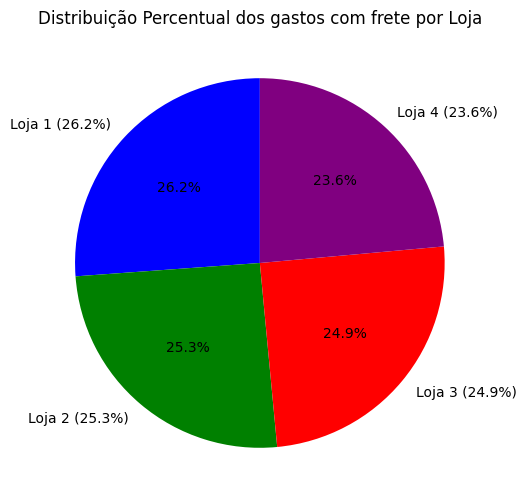

In [0]:
# Calcular os percentuais
percentuais = [frete / soma_total_frete * 100 for frete in soma_frete_por_loja]

# Criar rótulos com os percentuais
labels = [f"Loja {i+1} ({percentuais[i]:.1f}%)" for i in range(len(frete_por_loja))]

# Criar o gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(soma_frete_por_loja, labels=labels, autopct="%.1f%%", colors=["blue", "green", "red", "purple"], startangle=90)

# Adicionar título
plt.title("Distribuição Percentual dos gastos com frete por Loja")

# Exibir o gráfico
plt.show()

In [0]:
valor_medio_frete_loja = [df.select(avg('Frete')).collect()[0][0] for df in dfs_spark]

In [0]:
valor_medio_frete_loja

[34.6918049155115, 33.62194065817928, 33.07446427411743, 31.27899708184172]